In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
sns.set(style="whitegrid")

### Reading Data

In [2]:
df = pd.read_csv('../data/raw/telco.csv')
df.columns = df.columns.str.upper() # convert the columns to uppercase
df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,...,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
## drop customer ID

df.drop(['CUSTOMERID'], axis=1, inplace=True)

## change date type of TOTALCHARGES

df['TOTALCHARGES'] = pd.to_numeric(df['TOTALCHARGES'], errors='coerce')

### Data at a glance

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GENDER            7043 non-null   object 
 1   SENIORCITIZEN     7043 non-null   int64  
 2   PARTNER           7043 non-null   object 
 3   DEPENDENTS        7043 non-null   object 
 4   TENURE            7043 non-null   int64  
 5   PHONESERVICE      7043 non-null   object 
 6   MULTIPLELINES     7043 non-null   object 
 7   INTERNETSERVICE   7043 non-null   object 
 8   ONLINESECURITY    7043 non-null   object 
 9   ONLINEBACKUP      7043 non-null   object 
 10  DEVICEPROTECTION  7043 non-null   object 
 11  TECHSUPPORT       7043 non-null   object 
 12  STREAMINGTV       7043 non-null   object 
 13  STREAMINGMOVIES   7043 non-null   object 
 14  CONTRACT          7043 non-null   object 
 15  PAPERLESSBILLING  7043 non-null   object 
 16  PAYMENTMETHOD     7043 non-null   object 


In [5]:
df = df.dropna()

In [6]:
df['SENIORCITIZEN'] = df['SENIORCITIZEN'].map({1: 'Yes', 0: 'No'})

In [7]:
cols = df.columns.to_list()
cols

['GENDER',
 'SENIORCITIZEN',
 'PARTNER',
 'DEPENDENTS',
 'TENURE',
 'PHONESERVICE',
 'MULTIPLELINES',
 'INTERNETSERVICE',
 'ONLINESECURITY',
 'ONLINEBACKUP',
 'DEVICEPROTECTION',
 'TECHSUPPORT',
 'STREAMINGTV',
 'STREAMINGMOVIES',
 'CONTRACT',
 'PAPERLESSBILLING',
 'PAYMENTMETHOD',
 'MONTHLYCHARGES',
 'TOTALCHARGES',
 'CHURN']

In [8]:
cat_cols = [col for col in cols if df[col].dtype == 'object']
num_cols = [col for col in cols if df[col].dtype != 'object']

In [9]:
for col in df.columns:
    print(f'{len(df[col].unique())} Unique Values in {col}:')
    print(df[col].unique())
    print('=======================================')

2 Unique Values in GENDER:
['Female' 'Male']
2 Unique Values in SENIORCITIZEN:
['No' 'Yes']
2 Unique Values in PARTNER:
['Yes' 'No']
2 Unique Values in DEPENDENTS:
['No' 'Yes']
72 Unique Values in TENURE:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
2 Unique Values in PHONESERVICE:
['No' 'Yes']
3 Unique Values in MULTIPLELINES:
['No phone service' 'No' 'Yes']
3 Unique Values in INTERNETSERVICE:
['DSL' 'Fiber optic' 'No']
3 Unique Values in ONLINESECURITY:
['No' 'Yes' 'No internet service']
3 Unique Values in ONLINEBACKUP:
['Yes' 'No' 'No internet service']
3 Unique Values in DEVICEPROTECTION:
['No' 'Yes' 'No internet service']
3 Unique Values in TECHSUPPORT:
['No' 'Yes' 'No internet service']
3 Unique Values in STREAMINGTV:
['No' 'Yes' 'No internet service']
3 Unique Values in STREAMINGMOVIES:
['No' 'Yes' 'No inte

In [10]:
df.describe()

,TENURE,MONTHLYCHARGES,TOTALCHARGES
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [11]:
df.isna().sum()

GENDER              0
SENIORCITIZEN       0
PARTNER             0
DEPENDENTS          0
TENURE              0
PHONESERVICE        0
MULTIPLELINES       0
INTERNETSERVICE     0
ONLINESECURITY      0
ONLINEBACKUP        0
DEVICEPROTECTION    0
TECHSUPPORT         0
STREAMINGTV         0
STREAMINGMOVIES     0
CONTRACT            0
PAPERLESSBILLING    0
PAYMENTMETHOD       0
MONTHLYCHARGES      0
TOTALCHARGES        0
CHURN               0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(22)

### EDA

### Do long-tenure customers churn less?

In [13]:
grouped_by_contract = df.groupby('CONTRACT')['CHURN'].agg(
    total_customers='count',
    churned_customers=lambda x: (x == 'Yes').sum(),
)
grouped_by_contract['churn%'] = grouped_by_contract['churned_customers'] / grouped_by_contract['total_customers'] * 100
print(grouped_by_contract)

                total_customers  churned_customers     churn%
CONTRACT                                                     
Month-to-month             3875               1655  42.709677
One year                   1472                166  11.277174
Two year                   1685                 48   2.848665


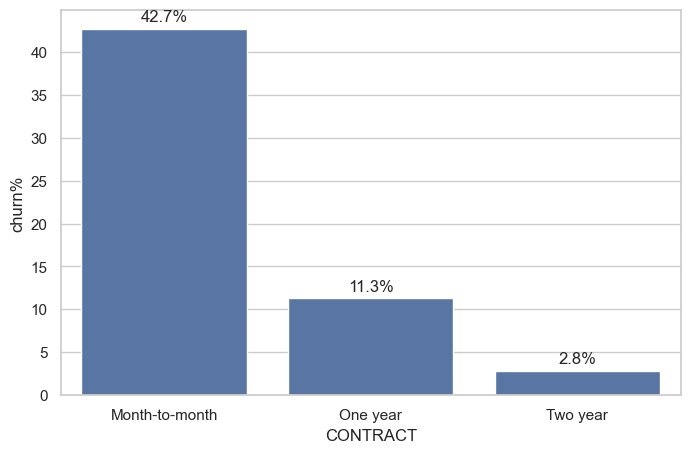

In [14]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=grouped_by_contract,
            x = 'CONTRACT',
            y = 'churn%',
            )

for container in ax.containers:
    ax.bar_label(container=container, fmt='%.1f%%', padding=3)

plt.show()

### Does payment method impact churn?

In [15]:
summary = df.groupby('PAYMENTMETHOD')['CHURN'].agg(
    total = 'count',
    churned = lambda x: (x=='Yes').sum(),
    not_churned = lambda x: (x=='No').sum()
)
summary['CHURN %'] = round(((summary['churned'] / (summary['churned'] + summary['not_churned'])) * 100), 2)
print(summary)

                           total  churned  not_churned  CHURN %
PAYMENTMETHOD                                                  
Bank transfer (automatic)   1542      258         1284    16.73
Credit card (automatic)     1521      232         1289    15.25
Electronic check            2365     1071         1294    45.29
Mailed check                1604      308         1296    19.20


<Axes: xlabel='CHURN %', ylabel='PAYMENTMETHOD'>

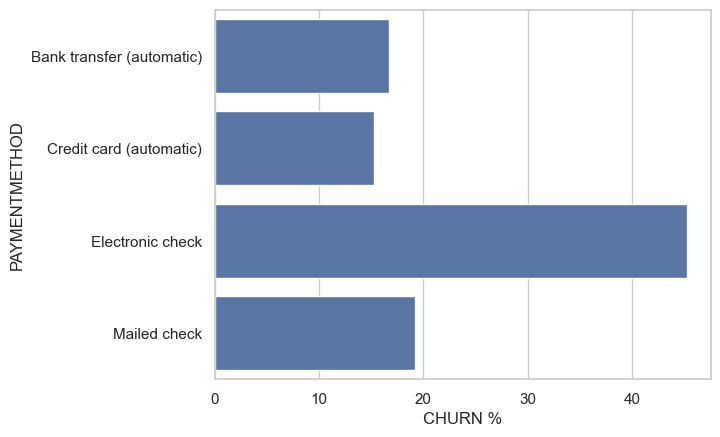

In [16]:
sns.barplot(summary, y='PAYMENTMETHOD', x='CHURN %')

### Are fiber optic users more likely to churn than DSL?

In [17]:
df['INTERNETSERVICE'].value_counts()

INTERNETSERVICE
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

In [18]:
summary = df.groupby('INTERNETSERVICE')['CHURN'].agg(
    total = 'count',
    churned = lambda x: (x=='Yes').sum()
)

summary['CHURN %'] = round((summary['churned'] / summary['total'] * 100), 2)

summary

,total,churned,CHURN %
INTERNETSERVICE,,,
DSL,2416,459,19.00
Fiber optic,3096,1297,41.89
No,1520,113,7.43


<Axes: xlabel='INTERNETSERVICE', ylabel='count'>

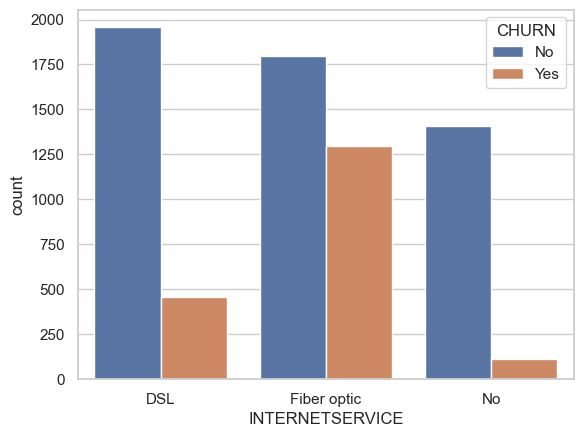

In [19]:
sns.countplot(data = df, x = 'INTERNETSERVICE', hue = 'CHURN')

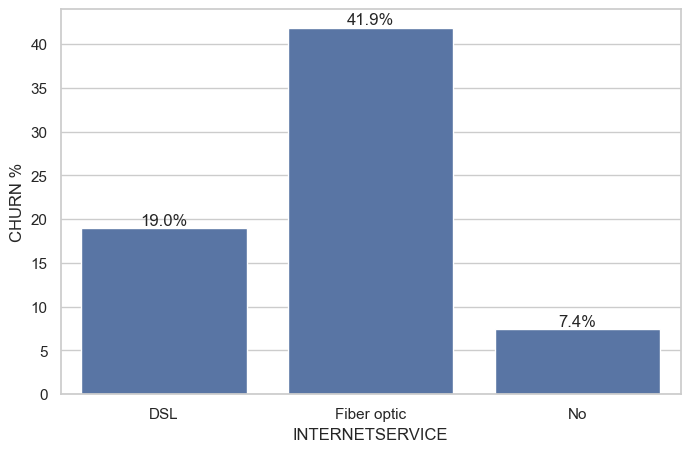

In [20]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data=summary, x='INTERNETSERVICE', y='CHURN %')

for container in ax.containers:
    ax.bar_label(container, fmt = '%.1f%%')

plt.show()

### Are monthly charges predictive of churn?

In [21]:
df[['MONTHLYCHARGES', 'CHURN']]

,MONTHLYCHARGES,CHURN
0,29.85,No
1,56.95,No
2,53.85,Yes
3,42.30,No
4,70.70,Yes
...,...,...
7038,84.80,No
7039,103.20,No
7040,29.60,No
7041,74.40,Yes


In [22]:
df['MONTHLYCHARGES'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MONTHLYCHARGES, dtype: float64

In [23]:
bins = [0, 20, 40, 60, 80, 100, 120]
df['MONTHLYCHARGE_BRACKET'] = pd.cut(df['MONTHLYCHARGES'], bins, right=True)

In [24]:
df[['MONTHLYCHARGE_BRACKET', 'CHURN']]

,MONTHLYCHARGE_BRACKET,CHURN
0,"(20, 40]",No
1,"(40, 60]",No
2,"(40, 60]",Yes
3,"(40, 60]",No
4,"(60, 80]",Yes
...,...,...
7038,"(80, 100]",No
7039,"(100, 120]",No
7040,"(20, 40]",No
7041,"(60, 80]",Yes


<Axes: xlabel='MONTHLYCHARGE_BRACKET', ylabel='count'>

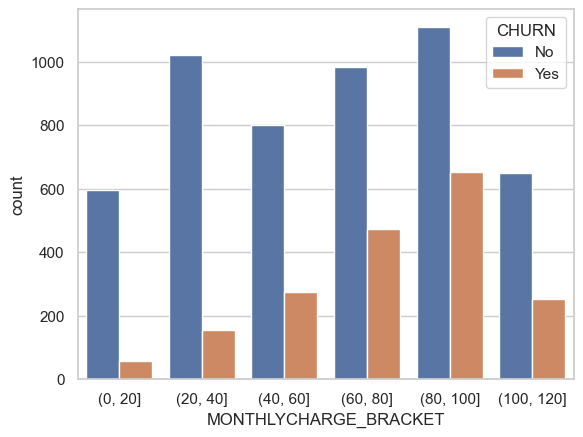

In [25]:
sns.countplot(data=df, x='MONTHLYCHARGE_BRACKET', hue='CHURN')

### What’s the churn rate by contract type?

In [26]:
grouped_by_contract = df.groupby('CONTRACT')['CHURN'].agg(
    total_customers='count',
    churned_customers=lambda x: (x == 'Yes').sum(),
)
grouped_by_contract['churn%'] = grouped_by_contract['churned_customers'] / grouped_by_contract['total_customers'] * 100
print(grouped_by_contract)

                total_customers  churned_customers     churn%
CONTRACT                                                     
Month-to-month             3875               1655  42.709677
One year                   1472                166  11.277174
Two year                   1685                 48   2.848665


### Is PaperlessBilling riskier?

<Axes: xlabel='PAPERLESSBILLING', ylabel='count'>

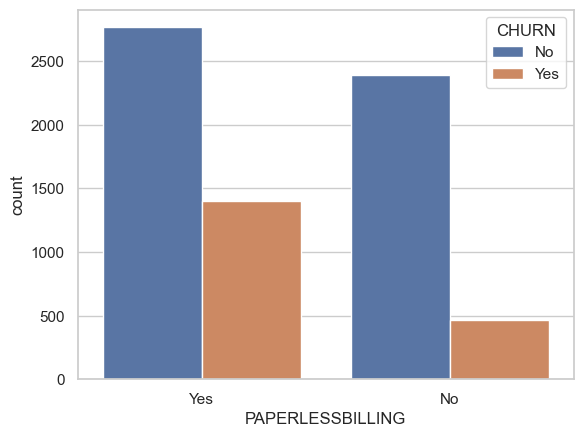

In [27]:
sns.countplot(data=df, x = 'PAPERLESSBILLING', hue='CHURN')

In [28]:
summary = df.groupby('PAPERLESSBILLING')['CHURN'].agg(
    total = 'count',
    churned = lambda x: (x == 'Yes').sum()
)
summary['CHURN %'] = round((summary['churned'] / summary['total'] * 100), 2)

summary[['total', 'CHURN %']]

,total,CHURN %
PAPERLESSBILLING,,
No,2864,16.38
Yes,4168,33.59


### Are seniors or customers without dependents more likely to churn?

In [29]:
df[['SENIORCITIZEN', 'DEPENDENTS', 'CHURN']]

,SENIORCITIZEN,DEPENDENTS,CHURN
0,No,No,No
1,No,No,No
2,No,No,Yes
3,No,No,No
4,No,No,Yes
...,...,...,...
7038,No,Yes,No
7039,No,Yes,No
7040,No,Yes,No
7041,Yes,No,Yes


In [30]:
summary = df.groupby(['SENIORCITIZEN', 'DEPENDENTS'])['CHURN'].agg(
    TOTAL = 'count',
    CHURNED = lambda x: (x=='Yes').sum()
)

summary['CHURNED %'] = round((summary['CHURNED'] / summary['TOTAL'] * 100), 2)
summary

TOTAL  CHURNED  CHURNED %
SENIORCITIZEN DEPENDENTS                           
No            No           3882     1089      28.05
              Yes          2008      304      15.14
Yes           No           1051      454      43.20
              Yes            91       22      24.18

<Axes: xlabel='SENIORCITIZEN', ylabel='CHURNED %'>

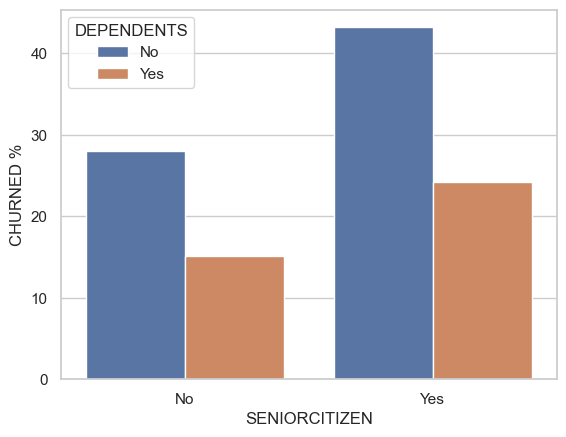

In [31]:
sns.barplot(data = summary, x='SENIORCITIZEN', y='CHURNED %', hue='DEPENDENTS')

### Which services are most associated with churn?

In [32]:
services = ['PHONESERVICE',
 'MULTIPLELINES',
 'INTERNETSERVICE',
 'ONLINESECURITY',
 'ONLINEBACKUP',
 'DEVICEPROTECTION',
 'TECHSUPPORT',
 'STREAMINGTV',
 'STREAMINGMOVIES',]

In [33]:
for service in services:
    print(f'Churns in {service}:')

    summary = df.groupby(service)['CHURN'].agg(
        churned = lambda x: (x=='Yes').sum()
    )
    print(summary)
    print(3 * "=============================")

Churns in PHONESERVICE:
              churned
PHONESERVICE         
No                170
Yes              1699
Churns in MULTIPLELINES:
                  churned
MULTIPLELINES            
No                    849
No phone service      170
Yes                   850
Churns in INTERNETSERVICE:
                 churned
INTERNETSERVICE         
DSL                  459
Fiber optic         1297
No                   113
Churns in ONLINESECURITY:
                     churned
ONLINESECURITY              
No                      1461
No internet service      113
Yes                      295
Churns in ONLINEBACKUP:
                     churned
ONLINEBACKUP                
No                      1233
No internet service      113
Yes                      523
Churns in DEVICEPROTECTION:
                     churned
DEVICEPROTECTION            
No                      1211
No internet service      113
Yes                      545
Churns in TECHSUPPORT:
                     churned
TECHSUPPORT     

Not using services like PHONE SERVICE, ONLINE BACKUP, DEVICE PROTECTION, TECH SUPPORT etc are high indicators of churn.

#### Checking relationship between 'STREAMINGTV' & 'STREAMINGMOVIES'

In [34]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df['STREAMINGMOVIES'], df['STREAMINGTV'])

test = chi2_contingency(table)

print(f'p_value: {test[1]}')
if test[1] < 0.5:
    print('Null hypothesis can be rejected, the two variables are not independent')
else:
    print('the two variables are independent of each other')

p_value: 0.0
Null hypothesis can be rejected, the two variables are not independent


### EDA CONCLUSION

- Customers with Short tenure (month-to-month) are more likely to churn. 
- Not using services like PHONE SERVICE, ONLINE BACKUP, DEVICE PROTECTION, TECH SUPPORT etc are high indicators of churn.
- Customers using 'electronic check' as payment method are more prone to churn.
- Fibre optic users are more likely to churn than DSL.
- There is a stead increase in churn rate as monthly charges increase upto $100. After that, churn rate gets down significantly. 
- Nearly 42% of customers with monthly payment contract churned. Number steeped down to 2% only when customer using two-year cycle.
- Paperless billing appears to be riskly, with nearly 33% churn rate.
- Very high churn rate (43%) in senior citizens with no dependents.
- 'STREAMINGTV' & 'STREAMINGMOVIES' are statistically dependent on one another.

### FEATURE ENGINEERING

- Create new features
- Encode categorical variables
- Normalize numerical values

#### New Features

In [35]:
df['CHARGE_PER_TENURE'] = df['TOTALCHARGES'] / (df['TENURE'] + 1)

df[['TENURE', 'TOTALCHARGES', 'MONTHLYCHARGES', 'CHARGE_PER_TENURE']].describe()

,TENURE,TOTALCHARGES,MONTHLYCHARGES,CHARGE_PER_TENURE
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,2283.300441,64.798208,59.083067
std,24.545260,2266.771362,30.085974,30.514438
min,1.000000,18.800000,18.250000,9.183333
25%,9.000000,401.450000,35.587500,26.225944
50%,29.000000,1397.475000,70.350000,61.070387
75%,55.000000,3794.737500,89.862500,84.877538
max,72.000000,8684.800000,118.750000,118.969863


In [36]:
df[['TENURE', 'TOTALCHARGES', 'CHARGE_PER_TENURE']].corr()

,TENURE,TOTALCHARGES,CHARGE_PER_TENURE
TENURE,1.000000,0.825880,0.412135
TOTALCHARGES,0.825880,1.000000,0.764489
CHARGE_PER_TENURE,0.412135,0.764489,1.000000


In [37]:
df2 = df[['TENURE', 'TOTALCHARGES', 'CHARGE_PER_TENURE', 'CHURN']].dropna()

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

X = df2[['TENURE', 'TOTALCHARGES', 'CHARGE_PER_TENURE']]
X = add_constant(X)

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


             Feature        VIF
0              const  11.317645
1             TENURE   4.944313
2       TOTALCHARGES   9.877109
3  CHARGE_PER_TENURE   3.782647


In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression  # or other model

X1 = df2[['TENURE', 'TOTALCHARGES']]
X2 = df2[['CHARGE_PER_TENURE']]
X3 = df2[['TENURE', 'TOTALCHARGES', 'CHARGE_PER_TENURE']]
y = df2['CHURN'].map({'Yes': 1, 'No': 0})

model = LogisticRegression(max_iter=1000)

print("Base model:", cross_val_score(model, X1, y, cv=5).mean())
print("Derived only:", cross_val_score(model, X2, y, cv=5).mean())
print("All features:", cross_val_score(model, X3, y, cv=5).mean())


Base model: 0.7699094448505288
Derived only: 0.7342150252598014
All features: 0.772182169825532


#### Derived-only model is decent but weaker:

- Accuracy: 0.734
- Meaning: CHARGE_PER_TENURE captures a large portion, but not all of the signal from the original features.
- This supports the idea that it's informative, but not a perfect substitute.

In [40]:
# dropping 'CHARGE_PER_TENURE'

df = df.drop(columns=['CHARGE_PER_TENURE'])

In [41]:
df.columns

Index(['GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'TENURE',
       'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE', 'ONLINESECURITY',
       'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'STREAMINGTV',
       'STREAMINGMOVIES', 'CONTRACT', 'PAPERLESSBILLING', 'PAYMENTMETHOD',
       'MONTHLYCHARGES', 'TOTALCHARGES', 'CHURN', 'MONTHLYCHARGE_BRACKET'],
      dtype='object')

In [42]:
# new column: IS_STREAMING
# If user is streaming either of the service (TV or MOVIES), IS_STREAMING=True

df['IS_STREAMING'] = ((df['STREAMINGMOVIES'] == 'Yes') | (df['STREAMINGTV'] == 'Yes')).astype(int)

In [43]:
df3 = df[['STREAMINGTV', 'STREAMINGMOVIES', 'IS_STREAMING', 'CHURN']]
cols = list(df3.columns)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_df3 = encoder.fit_transform(df3)

df3 = pd.DataFrame(encoded_df3, columns=encoder.get_feature_names_out(cols))
df3


,STREAMINGTV_No internet service,STREAMINGTV_Yes,STREAMINGMOVIES_No internet service,STREAMINGMOVIES_Yes,IS_STREAMING_1,CHURN_Yes
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
7027,0.0,1.0,0.0,1.0,1.0,0.0
7028,0.0,1.0,0.0,1.0,1.0,0.0
7029,0.0,0.0,0.0,0.0,0.0,0.0
7030,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
model2 = LogisticRegression(max_iter=1000)

X1 = df3[['STREAMINGTV_No internet service', 'STREAMINGTV_Yes',
       'STREAMINGMOVIES_No internet service', 'STREAMINGMOVIES_Yes', 'CHURN_Yes']]
X2 = df3[['IS_STREAMING_1', 'CHURN_Yes']]
X3 = df3[['STREAMINGTV_No internet service', 'STREAMINGTV_Yes',
       'STREAMINGMOVIES_No internet service', 'STREAMINGMOVIES_Yes',
       'IS_STREAMING_1', 'CHURN_Yes']]
y = df3['CHURN_Yes']

print("Base model:", cross_val_score(model2, X1, y, cv=5).mean())
print("Derived only:", cross_val_score(model2, X2, y, cv=5).mean())
print("All features:", cross_val_score(model2, X3, y, cv=5).mean())

Base model: 1.0
Derived only: 1.0
All features: 1.0


We can keep 'IS_STREAMING' instead of 'STREAMINGTV' and "STREAMINGMOVIES'

In [45]:
df = df.drop(columns=['STREAMINGTV', 'STREAMINGMOVIES', 'MONTHLYCHARGE_BRACKET'])

### Train-Test Split

In [46]:
# separate target from features
X = df.drop(columns=['CHURN'])
y = df['CHURN'].map({'Yes': 1, 'No': 0})

In [77]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GENDER            7032 non-null   object 
 1   SENIORCITIZEN     7032 non-null   object 
 2   PARTNER           7032 non-null   object 
 3   DEPENDENTS        7032 non-null   object 
 4   TENURE            7032 non-null   int64  
 5   PHONESERVICE      7032 non-null   object 
 6   MULTIPLELINES     7032 non-null   object 
 7   INTERNETSERVICE   7032 non-null   object 
 8   ONLINESECURITY    7032 non-null   object 
 9   ONLINEBACKUP      7032 non-null   object 
 10  DEVICEPROTECTION  7032 non-null   object 
 11  TECHSUPPORT       7032 non-null   object 
 12  CONTRACT          7032 non-null   object 
 13  PAPERLESSBILLING  7032 non-null   object 
 14  PAYMENTMETHOD     7032 non-null   object 
 15  MONTHLYCHARGES    7032 non-null   float64
 16  TOTALCHARGES      7032 non-null   float64
 17  

In [79]:
X.sample(5)

,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,IS_STREAMING
5380,Male,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,80.25,144.55,1
391,Male,Yes,Yes,No,27,Yes,Yes,DSL,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),84.80,2309.55,1
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0
6428,Female,No,No,No,6,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Mailed check,69.25,418.40,0
2830,Male,No,No,No,60,Yes,No,DSL,Yes,Yes,Yes,No,Two year,No,Electronic check,61.40,3638.25,0


In [47]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Data Transformation

In [48]:
# separate the columns

num_cols = X.select_dtypes(include=['number']).columns.to_list()
cat_cols = X.select_dtypes(include=['object']).columns.to_list()

In [75]:
print(num_cols)
print(cat_cols)

['TENURE', 'MONTHLYCHARGES', 'TOTALCHARGES', 'IS_STREAMING']
['GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'PHONESERVICE', 'MULTIPLELINES', 'INTERNETSERVICE', 'ONLINESECURITY', 'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'CONTRACT', 'PAPERLESSBILLING', 'PAYMENTMETHOD']


In [49]:
# Transformation pipelines

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder())
])

In [50]:
# ColumnTransformer

from sklearn.compose import ColumnTransformer

transform = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_cols ),
    ('cat', cat_pipeline, cat_cols)
])

In [51]:
transformer = transform.fit(X_train)

In [52]:
feature_names  = list(transform.get_feature_names_out())

In [53]:
# preparing data for modeling

X_train_ready = transformer.transform(X_train)
X_test_ready = transformer.transform(X_test)

In [54]:
# saving transformer
import joblib

joblib.dump(transformer, "../models/transformer.pkl")

['../models/transformer.pkl']

## Baseline Models

In [55]:
print(X_train.shape)
print(X_test.shape)

(5625, 18)
(1407, 18)


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report

models ={
    'base_lr': LogisticRegression(),
    'base_tree': DecisionTreeClassifier(),
    'base_rf': RandomForestClassifier()
}

In [57]:
for name, model in models.items():
    model.fit(X_train_ready, y_train)
    y_pred = model.predict(X_test_ready)
    
    print(f'Model: {name}')
    print(f'acc = {accuracy_score(y_test, y_pred)*100}')
    print(f'f1 = {f1_score(y_test, y_pred)}')
    print(f'precision = {precision_score(y_test, y_pred)}')
    print(f'recall = {recall_score(y_test, y_pred)}')
    print(f'matrix_{name} = {confusion_matrix(y_test, y_pred)}')
    
    print('=' * 30)

Model: base_lr
acc = 79.95735607675905
f1 = 0.5994318181818182
precision = 0.6393939393939394
recall = 0.5641711229946524
matrix_base_lr = [[914 119]
 [163 211]]
Model: base_tree
acc = 71.57071783937455
f1 = 0.4805194805194805
precision = 0.4671717171717172
recall = 0.4946524064171123
matrix_base_tree = [[822 211]
 [189 185]]
Model: base_rf
acc = 78.46481876332622
f1 = 0.549777117384844
precision = 0.6187290969899666
recall = 0.4946524064171123
matrix_base_rf = [[919 114]
 [189 185]]


##### Logistic Regression Model

Model: Linear Regression - Baseline model
Model Accuracy = 0.7995735607675906
Classification Report for Linear Regression
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1033
           1       0.64      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



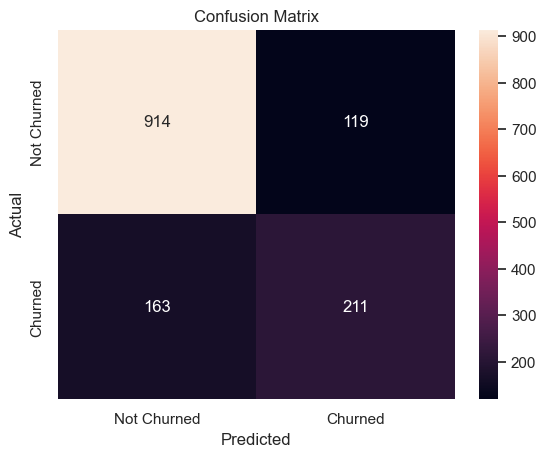

In [58]:
base_reg = LogisticRegression()
base_reg.fit(X_train_ready, y_train)
y_pred_reg = base_reg.predict(X_test_ready)

reg_report = classification_report(y_test, y_pred_reg)

print('Model: Linear Regression - Baseline model')
print(f'Model Accuracy = {accuracy_score(y_test, y_pred_reg)}')
print('Classification Report for Linear Regression')
print(reg_report)

reg_matrix = confusion_matrix(y_test, y_pred_reg)
sns.heatmap(reg_matrix, annot=True, fmt='d',
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

| Insight                           | Interpretation                                                         |
| --------------------------------- | ---------------------------------------------------------------------- |
| High precision/recall for class 0 | Model is very good at identifying customers who will **not churn**     |
| Low recall for class 1 (churned)  | Model **misses** \~44% of actual churners                              |
| Moderate F1 for class 1           | Model struggles to balance precision and recall for the minority class |
| Accuracy of 80%                   | Looks good, but leans more towards 'Not Churn'                         |


##### Decision Tree Model

Model: Decision Tree - Baseline Model
Model Accuracy = 0.7213930348258707
Classification Report for Decision Tree Model
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.50      0.49       374

    accuracy                           0.72      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.72      0.72      1407



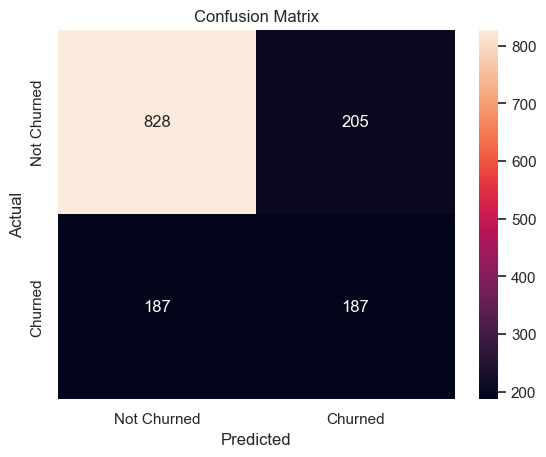

In [59]:
base_tree = DecisionTreeClassifier()
base_tree.fit(X_train_ready, y_train)
y_pred_tree = base_tree.predict(X_test_ready)
tree_report = classification_report(y_test, y_pred_tree)

print('Model: Decision Tree - Baseline Model')
print(f'Model Accuracy = {accuracy_score(y_test, y_pred_tree)}')
print('Classification Report for Decision Tree Model')
print(tree_report)

tree_matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(tree_matrix, annot = True, fmt='d', 
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

| Insight                           | Interpretation                                                         |
| --------------------------------- | ---------------------------------------------------------------------- |
| High precision/recall for class 0 | Model is very good at identifying customers who will **not churn**     |
| Low recall for class 1 (churned)  | Model **misses** \~50% of actual churners                              |
| Moderate F1 for class 1           | Model struggles to balance precision and recall for the minority class |
| Accuracy of 72%                   | Low accuracy than Logistic Regression                       |


##### Random Forest Classifier

Model: Random Forest - Baseline Model
Model Accuracy = 0.7867803837953091
Classification Report for Random Forest Model
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



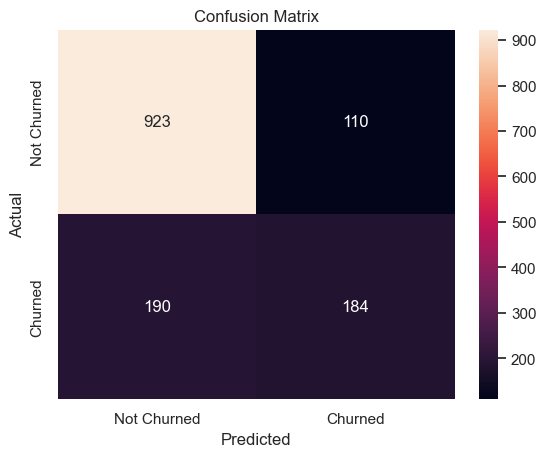

In [60]:
base_forest = RandomForestClassifier()
base_forest.fit(X_train_ready, y_train)
y_pred_forest = base_forest.predict(X_test_ready)
forest_report = classification_report(y_test, y_pred_forest)

print('Model: Random Forest - Baseline Model')
print(f'Model Accuracy = {accuracy_score(y_test, y_pred_forest)}')
print('Classification Report for Random Forest Model')
print(forest_report)

forest_matrix = confusion_matrix(y_test, y_pred_forest)
sns.heatmap(forest_matrix, annot = True, fmt='d', 
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

| Insight                           | Interpretation                                                         |
| --------------------------------- | ---------------------------------------------------------------------- |
| High precision/recall for class 0 | Model is very good at identifying customers who will **not churn**     |
| Low recall for class 1 (churned)  | Model **misses** \~50% of actual churners                              |
| Moderate F1 for class 1           | Model struggles to balance precision and recall for the minority class |
| Accuracy of 72%                   | Low accuracy than Logistic Regression                       |


##### Summary

- All three models suffers from high class imbalance in target class.
- Logistic Regression (accuracy = 80%) outperformed Decision Tree (accuracy = 72%) and Random Forest (accuracy = 79%) models.
- All three performed well for predicing non-churners, but performed poorly on predicting churners.
    - Logistic Regression missed to predict ~44% churners.
    - Decision Tree and Random Forest missed to predict almost 50% churners.

##### Next Action
- Deal with class imbalance for better performance
- Select a model 
- Hyperparameter tuning

##### Handling class imbalance

In [61]:
df['CHURN'].value_counts()

CHURN
No     5163
Yes    1869
Name: count, dtype: int64

In [62]:
churn_percent = round((len(df[df['CHURN'] == 'Yes']) / len(df)) * 100, 2)
print(f'class_ratio (Yes:No) = {churn_percent} : {100 - churn_percent}')

class_ratio (Yes:No) = 26.58 : 73.42


In [63]:
# define a reusable function to train the model

def classifier(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    print('Classification Report')
    print(report)

    sns.heatmap(matrix, annot=True, fmt = 'd', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


#### 1. Using Class Weights

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407



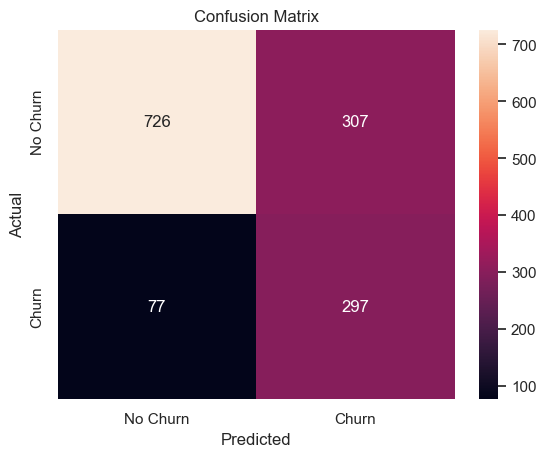

In [64]:
lr_weighted = LogisticRegression(class_weight='balanced')

classifier(lr_weighted, X_train_ready, X_test_ready, y_train, y_test)

| insight | interpretation |
|---------|-------------------|
| high precision for class 0| model achieved high precision (90%) for non-churners|
|recall for class 1 improved| model can better predict churners (from 56% to 80%)|
| lower accuracy | overall accuracy declined from 80% to 73%|

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.61      0.47      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



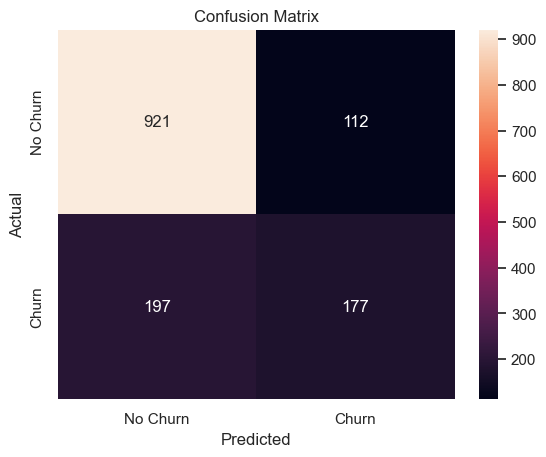

In [65]:
rf_weighted = RandomForestClassifier(class_weight='balanced')

classifier(rf_weighted, X_train_ready, X_test_ready, y_train, y_test)

##### 2. Synthetic Oversampling with SMOTE

In [66]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smot, y_train_smot = smote.fit_resample(X_train_ready, y_train)

In [67]:
print('Original Shape')
print(X_train_ready.shape)
print('#' * 30)
print('new shape')
print(X_train_smot.shape)

Original Shape
(5625, 41)
##############################
new shape
(8260, 41)


Classification Report
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.78      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.75      1407



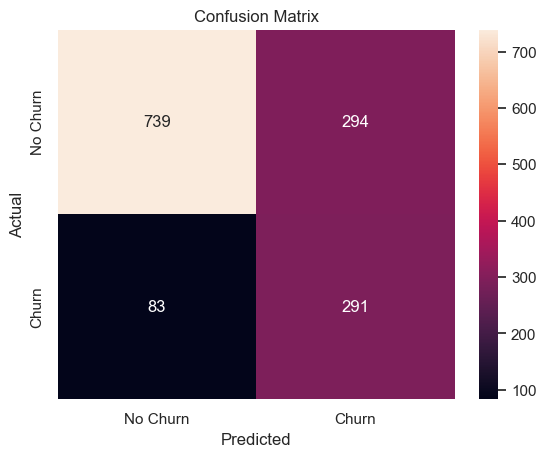

In [68]:
lr_smot = LogisticRegression()
classifier(lr_smot, X_train_smot, X_test_ready, y_train_smot, y_test)

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1033
           1       0.57      0.56      0.57       374

    accuracy                           0.77      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.77      0.77      1407



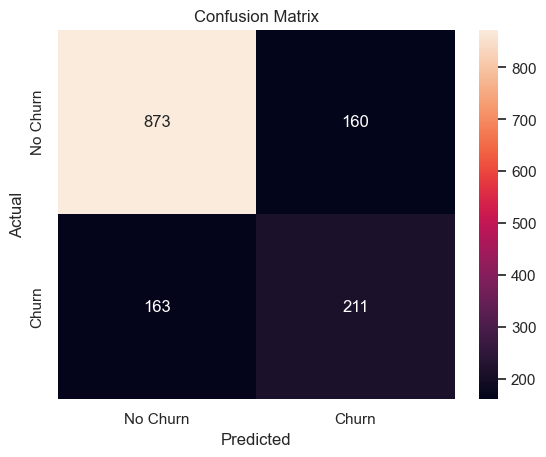

In [69]:
rf_smot = RandomForestClassifier()
classifier(rf_smot, X_train_smot, X_test_ready, y_train_smot, y_test)

In [70]:
# helper function for roc-auc curve

from sklearn.metrics import roc_curve, roc_auc_score

def plot_curve(ax, model, X_train, y_train, X_test, y_test, title):

    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresh = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_pred)
    ax.plot(fpr,tpr,label=f"{title} AUC={auc:.3f}")

    ax.set_title('ROC Curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc=0)

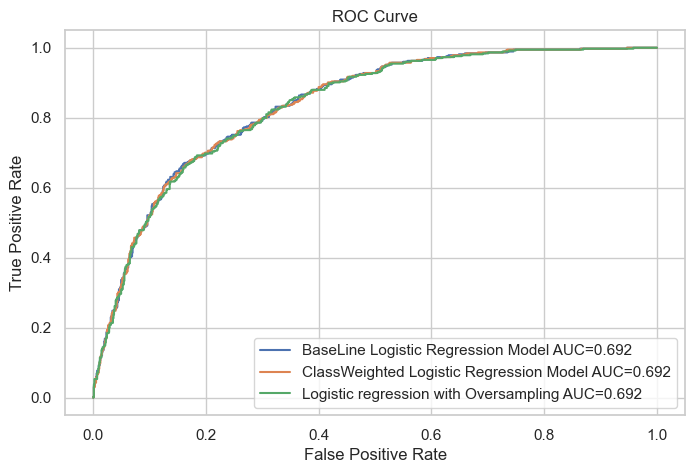

In [71]:
# Logistic regression model

model = LogisticRegression()
weighted_model = LogisticRegression(class_weight='balanced')

fig,ax = plt.subplots(1,1,figsize=(8,5))
plot_curve(ax, model, X_train_ready, y_train, X_test_ready, y_test, 'BaseLine Logistic Regression Model')
plot_curve(ax, weighted_model, X_train_ready, y_train, X_test_ready, y_test, 'ClassWeighted Logistic Regression Model')
plot_curve(ax, model, X_train_smot, y_train_smot, X_test_ready, y_test, 'Logistic regression with Oversampling')

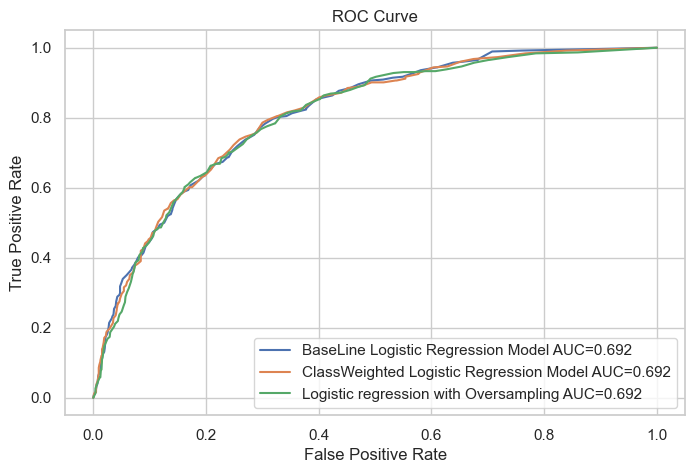

In [72]:
# Random Forest Model

model = RandomForestClassifier()
weighted_model = RandomForestClassifier(class_weight='balanced')

fig,ax = plt.subplots(1,1,figsize=(8,5))
plot_curve(ax, model, X_train_ready, y_train, X_test_ready, y_test, 'BaseLine Logistic Regression Model')
plot_curve(ax, weighted_model, X_train_ready, y_train, X_test_ready, y_test, 'ClassWeighted Logistic Regression Model')
plot_curve(ax, model, X_train_smot, y_train_smot, X_test_ready, y_test, 'Logistic regression with Oversampling')

#### Conclusions

Across all tested models and techniques (baseline, class weighting, and oversampling), the following observations emerge:

- Linear Regression (baseline) achieved the highest overall accuracy (≈ 0.80) and strong performance on the majority class (Class 0), but struggled with the minority class (Class 1), with recall at 0.56.

- Applying class weighting or minority oversampling to Logistic Regression:

    - Did not significantly improve AUC (all ≈ 0.695),

    - But improved recall for Class 1 (up to 0.78) at the cost of precision.

- Random Forest models, though generally good at handling class imbalance, showed no significant gain over Logistic Regression. Class-weighted and oversampled versions still hovered around 0.77–0.78 accuracy and AUC ~0.695.

- ROC curves for all models were nearly identical, suggesting that model type and sampling strategy had little impact on separability of churn vs. non-churn customers.

#### Final Save all Data for Model Building

In [73]:
import json
import joblib

joblib.dump(X_train_smot, '../data/processed/X_train.pkl')
joblib.dump(y_train_smot, '../data/processed/y_train.pkl')
joblib.dump(X_test_ready, '../data/processed/X_test.pkl')
joblib.dump(y_test, '../data/processed/y_test.pkl')

with open("../data/processed/feature_columns.json", "w") as f:
    json.dump(feature_names, f)

Continued in ml_modeling